In [28]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import shap
from sklearn.preprocessing import OneHotEncoder

In [29]:
df = pd.read_csv(r'C:\Users\mail2\Desktop\ml\resume_stuff\diabeties\diabetes_prediction_dataset.csv')

In [30]:
df[df['diabetes']==1].shape

(8500, 9)

In [31]:
df3=df[df['diabetes']==1]
df4=df[df['diabetes']==0]
df3=df3.append(df4.sample(n=df[df['diabetes']==1].shape[0]))
df3

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
98012,Female,26.0,0,0,No Info,19.84,6.6,85,0
69764,Male,21.0,0,0,No Info,22.05,5.0,126,0
29385,Male,0.8,0,0,No Info,16.52,6.6,140,0
24506,Female,49.0,1,0,never,40.03,6.2,90,0


In [32]:
df3=df3.sample(frac=1).reset_index(drop=True)
x=df3.copy()
y=x[df3.columns[-1]]
del x[df3.columns[-1]]

In [33]:
x['smoking_history'].unique()

array(['never', 'current', 'former', 'No Info', 'ever', 'not current'],
      dtype=object)

In [34]:
s=x['gender'].unique()
t=x['smoking_history'].unique()
x.replace(s,{0,1,2},inplace=True)
x.replace(t,{0,1,2,3,4,5},inplace=True)

In [35]:
xtrain , xtest , ytrain , ytest= train_test_split(x,y,test_size=0.2)

In [36]:
xtrain.shape

(13600, 8)

In [37]:
model = RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [38]:
pred= model.predict(xtest)
pred= np.where(pred<0.5,0,1)

<AxesSubplot: >

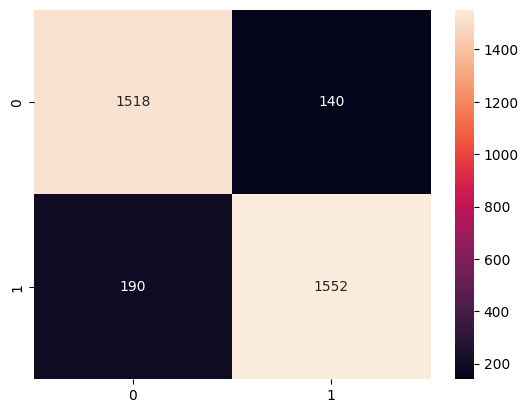

In [39]:
cf= confusion_matrix(pred,ytest)
sns.heatmap(cf,annot=True,fmt='g')


Exact explainer: 3401it [09:30,  5.80it/s]                          
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


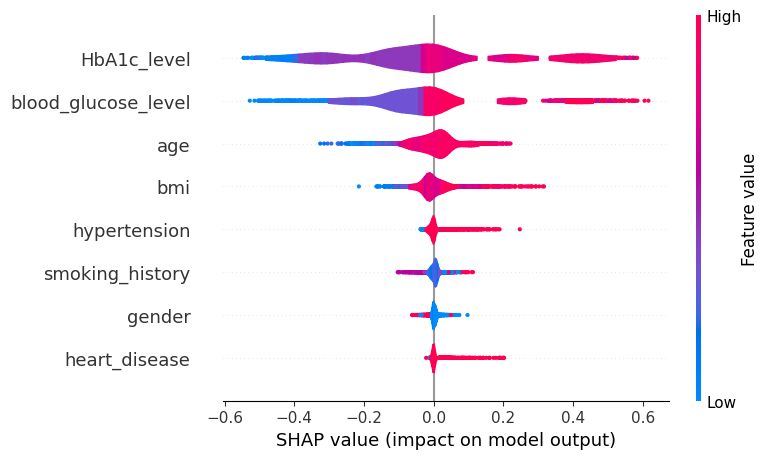

In [44]:
explainer=shap.Explainer(model.predict,xtest)
shap_values = explainer(xtest)


In [56]:
model.predict([[0,51,1,0,0,25.19,6.6,200]])

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([0.71])

In [51]:
df['gender'].unique(),df['smoking_history'].unique()

(array(['Female', 'Male', 'Other'], dtype=object),
 array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
       dtype=object))

In [43]:
from sklearn import metrics
metrics.accuracy_score(ytest,pred)

0.9029411764705882